In [1]:
import numpy as np

block_length = 1000000
snr_db = np.arange(1, 15, 1)
ber_results = []

for snr_db_value in snr_db:
    snr = 10 ** (snr_db_value * 0.1)
    sys_real = 2 * (np.random.randint(0, 2, block_length) - 0.5)  # In-phase component
    sys_imag = 2 * (np.random.randint(0, 2, block_length) - 0.5)  # Quadrature component
    sys = sys_real + 1j * sys_imag  # QPSK symbols

    noise_real = np.random.normal(0, 1, block_length)
    noise_imag = np.random.normal(0, 1, block_length)
    noise = noise_real + 1j * noise_imag  # Complex Gaussian noise

    transmitted_symbols = sys * np.sqrt(snr)
    received_symbols = transmitted_symbols + noise

    decoded_real = np.real(received_symbols) > 0
    decoded_imag = np.imag(received_symbols) > 0
    decoded_bits = 2 * decoded_real - 1 + 1j * (2 * decoded_imag - 1)

    bit_errors = np.sum(decoded_bits != sys)
    ber = bit_errors / (2 * block_length)  # Factor of 2 because we have 2 bits per symbol
    ber_results.append(ber)

for snr_db_value, ber in zip(snr_db, ber_results):
    print(f"SNR (dB): {snr_db_value}, Bit Error Rate: {ber:.4f}")


SNR (dB): 1, Bit Error Rate: 0.1224
SNR (dB): 2, Bit Error Rate: 0.0987
SNR (dB): 3, Bit Error Rate: 0.0757
SNR (dB): 4, Bit Error Rate: 0.0550
SNR (dB): 5, Bit Error Rate: 0.0369
SNR (dB): 6, Bit Error Rate: 0.0230
SNR (dB): 7, Bit Error Rate: 0.0125
SNR (dB): 8, Bit Error Rate: 0.0060
SNR (dB): 9, Bit Error Rate: 0.0024
SNR (dB): 10, Bit Error Rate: 0.0008
SNR (dB): 11, Bit Error Rate: 0.0002
SNR (dB): 12, Bit Error Rate: 0.0000
SNR (dB): 13, Bit Error Rate: 0.0000
SNR (dB): 14, Bit Error Rate: 0.0000


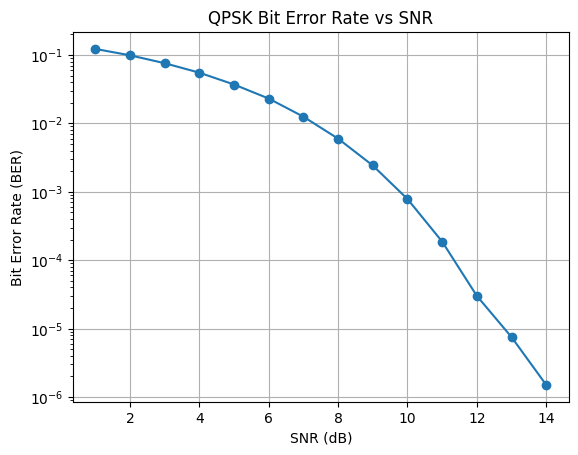

In [2]:

import matplotlib.pyplot as plt
plt.semilogy(snr_db, ber_results, marker='o')
plt.title('QPSK Bit Error Rate vs SNR')
plt.xlabel('SNR (dB)')
plt.ylabel('Bit Error Rate (BER)')
plt.grid(True)
plt.show()